In [6]:
import pandas as pd
import sklearn

df = pd.read_table('../data/sms.tsv', sep='\t', header=None, names=['label', 'msg'])
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='label'>

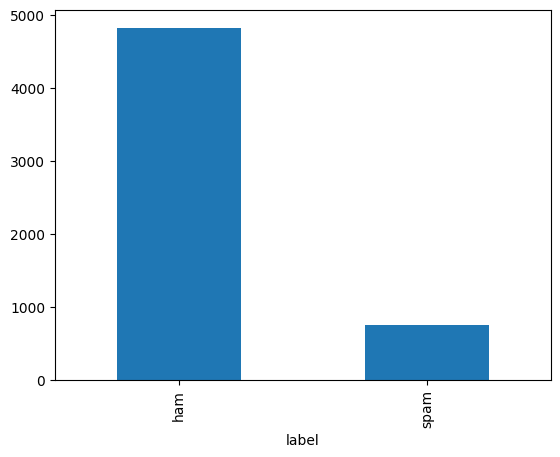

In [7]:
df.label.value_counts().plot(kind="bar")

In [8]:
df.label.value_counts() / df.shape[0]

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [9]:
df.msg = df.msg.apply(lambda x:x.lower())
# make all strings lower case so we can search easier
df[df.msg.str.contains('send cash now')].shape # == (0, 2)


(0, 2)

In [11]:
spams = df[df.label == 'spam']
for word in ['send', 'cash', 'now']:
    print( word, spams[spams.msg.str.contains(word)].shape[0] / float(spams.shape[0]))


send 0.0963855421686747
cash 0.09103078982597054
now 0.2797858099062918


In [21]:
# simple count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer # start with a simple example

train_simple = ['call you tonight',
'Call me a cab',
'please call me... PLEASE 44!']

# learn the 'vocabulary' of the training data 

vect = CountVectorizer()
train_simple_dtm = vect.fit_transform(train_simple) 

pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names_out())


,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [22]:
# TODO remind editor to change to `get_feature_names_out`

In [24]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)
test_simple = ["please don't call me"] 
test_simple_dtm = vect.transform(test_simple) 
test_simple_dtm.toarray()

pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names_out())


,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


In [28]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1)

# instantiate the vectorizer 
vect = CountVectorizer()

# learn vocabulary and create document-term matrix in a single step 
train_dtm = vect.fit_transform(X_train)
train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [29]:
# remind editor to make it model_selection

In [31]:
# transform testing data into a document-term matrix 
test_dtm = vect.transform(X_test)
test_dtm


<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [33]:
## MODEL BUILDING WITH NAIVE BAYES

# train a Naive Bayes model using train_dtm 

from sklearn.naive_bayes import MultinomialNB # import our model

nb = MultinomialNB()
# instantiate our model

nb.fit(train_dtm, y_train)
# fit it to our training set

MultinomialNB()

In [34]:
# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)

preds

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [37]:
# compare predictions to true labels
from sklearn import metrics
print(metrics.accuracy_score(y_test, preds))
print(metrics.confusion_matrix(y_test, preds))


0.9885139985642498
[[1203    5]
 [  11  174]]


In [38]:
# remind editor for print statement needs ()

In [39]:
nb.classes_

array(['ham', 'spam'], dtype='<U4')

In [11]:
# read in the data
titanic = pd.read_csv('../data/short_titanic.csv')
# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the median age 
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

X.head()

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,False,True
1,1,0,38.0,False,False
2,3,0,26.0,False,True
3,1,0,35.0,False,True
4,3,1,35.0,False,True


In [12]:
# fit a classification tree with max_depth=3 on all data 
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)

treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assuming X and y are already defined and contain your data
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8), dpi=1000)  # Set the size of the figure
plot_tree(treeclf, filled=True, feature_names=feature_cols, class_names=['Did not survive', 'Survived'])
plt.show()


In [14]:
# TODO remidner to editor give new image to book

In [15]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258


In [16]:
# import the beer dataset
beer = pd.read_csv('../data/beer.txt', sep=' ')
beer.head()


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [ ]:
# define X
X = beer.drop('name', axis=1)

# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)

km.fit(X)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2],
      dtype=int32)

In [134]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_

In [135]:
# calculate the mean of each feature for each cluster
desc = beer.drop('name', axis=1).groupby('cluster').mean()
desc

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


Text(0, 0.5, 'alcohol')

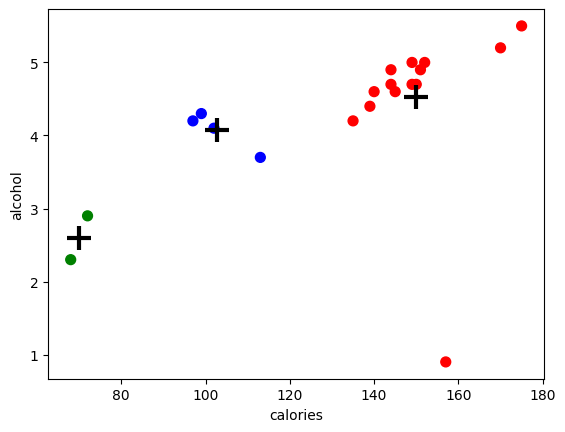

In [136]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# save the DataFrame of cluster centers 
centers = desc # create a "colors" array for plotting
colors = np.array(['red', 'green', 'blue', 'yellow'])
# scatter plot of calories ve.rsus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels 
plt.xlabel('calories')
plt.ylabel('alcohol')

In [143]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics 
metrics.silhouette_score(X, km.labels_)

0.07457858794811631

In [144]:
km

KMeans(n_clusters=19, n_init='auto', random_state=1)

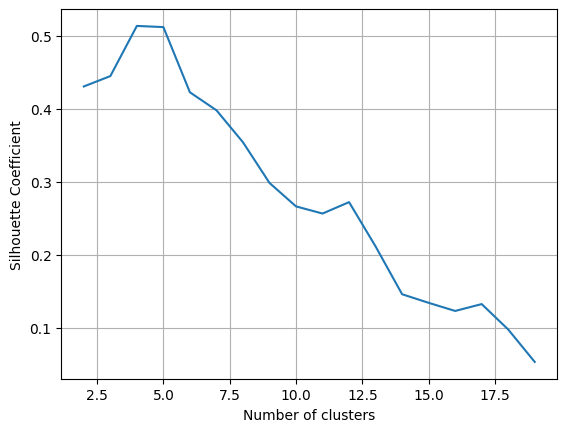

In [147]:
# center and scale the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# calculate SC for K=2 through K=19 
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1, n_init='auto') 
    km.fit(X_scaled) 
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

# plot the results 
plt.plot(k_range, scores) 
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient') 
plt.grid(True)


In [148]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means with 3 clusters on scaled data 
km = KMeans(n_clusters=3, random_state=1) 
km.fit(X_scaled)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [176]:
X = pd.DataFrame(vect.fit_transform(df.msg.head(4086)).todense(), columns=vect.get_feature_names_out())

In [179]:
X.head(3)

,00,000,000pes,008704050406,0089,01223585236,01223585334,0125698789,02,0207,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
d = 1
# Let's look for points within 1 unit of one another

X_first_word = X.iloc[:,:1]
# Only looking at the first column, but ALL of the rows

from sklearn.neighbors import NearestNeighbors
# this module will calculate for us distances between each point

neigh = NearestNeighbors(n_neighbors=4086) 
neigh.fit(X_first_word)
# tell the module to calculate each distance between each point


A = neigh.kneighbors_graph(X_first_word, mode='distance').todense() # This matrix holds all distances (over 16 million of them)

num_points_within_d = (A < d).sum()
# Count the number of pairs of points within 1 unit of distance
num_points_within_d

16613876

In [183]:
X_first_two_words = X.iloc[:,:2]
neigh = NearestNeighbors(n_neighbors=4086) 
neigh.fit(X_first_two_words)
A = neigh.kneighbors_graph(X_first_two_words, mode='distance').todense() 
num_points_within_d = (A < d).sum()

# num_points_within_d is fewer
num_points_within_d

16435420

In [193]:
from tqdm import tqdm

list_num_points_within_d = []

num_columns = range(1, 101)
# Looking at the first 100 columns points = []
# We will be collecting the number of points within 1 unit for a graph

neigh = NearestNeighbors(n_neighbors=X.shape[0]) 
for subset in tqdm(num_columns):
    X_subset = X.iloc[:,:subset]
    # look at the first column, then first two columns, then first three columns, etc
    neigh.fit(X_subset)
    A = neigh.kneighbors_graph(X_subset, mode='distance').todense() 
    num_points_within_d = (A < d).sum()
    list_num_points_within_d.append(num_points_within_d)

# calculate the number of points within 1 unit points.append(num_points_within_d)



100%|█████████████████████████████████████████| 100/100 [01:00<00:00,  1.64it/s]


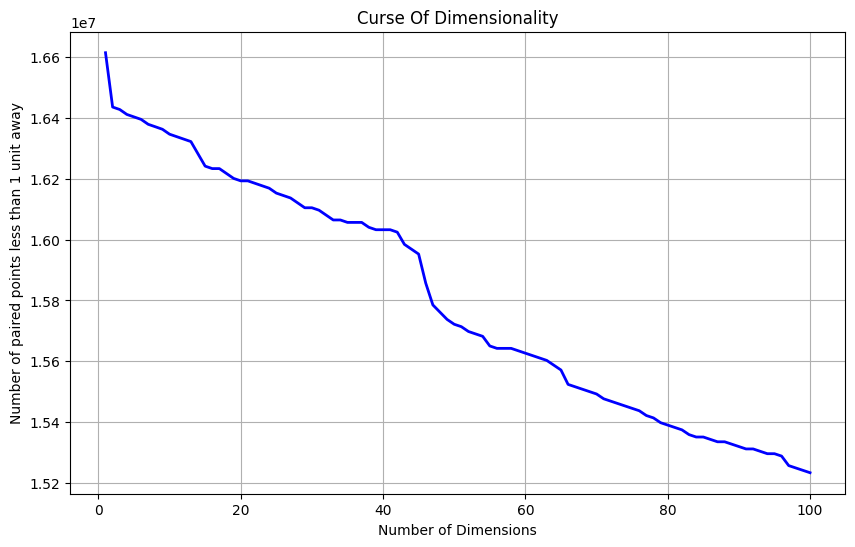

In [197]:
import matplotlib.pyplot as plt

# Assuming list_num_points_within_d is the list of the number of paired points less than 1 unit away
# for each dimension, as seen on the x-axis of the graph provided.
# This list would need to be provided or calculated based on some data or criteria.
# Since the actual values are not provided, I will create a dummy list that decreases as the number of dimensions increase,
# which is the general trend we observe in the "Curse of Dimensionality".

# Generate a dummy list to simulate the trend seen in the image
import numpy as np

dimensions = np.arange(1, 101)  # From 1 to 100 dimensions
# Creating a dummy list where the number of points decreases with increasing dimensions

# Now let's plot the graph
plt.figure(figsize=(10, 6))
plt.plot(dimensions, list_num_points_within_d, marker='', color='blue', linewidth=2)
plt.title('Curse Of Dimensionality')
plt.xlabel('Number of Dimensions')
plt.ylabel('Number of paired points less than 1 unit away')
plt.grid(True)
plt.show()
